In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of the dataset

In [2]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
# Rows and Columns in the dataset
df.shape

(50000, 6)

### Executive Summary

1. Data highlight - All categorical features are equally distributed among the classes. Numeric features are normally distributed. Negative numbers are seen in house price feature. 
2. Buying Recommendation - The pricings are equal among all the categories. The house can be purchased based on the bnuilding area required by an individual and the budget (pricing). 
3. Model Interpretability - Square Feet area, number of  bedrooms and bathrooms are important features considered while purchasing the house. Year Built and Neighborhood are least considered 

### Question 1: What are the issues with the dataset? - Quantify the issues to back up your answer



**Answer Summary:**

1. Missing Values : No missing values are seen in the dataset
2. **Unexpected Values : Negative numbers are seen in the Price feature. 22 Rows contain negative values**
3. Duplicate Rows : No Duplicate rows seen
4. Data types : All data types of columns are appropriate. Hence no conversion of the data types is necessary
5. Unique values in categorical feature (Neighborbood) : Values are clean and no inconsistent category seen
6. **Outliers : Outliers are seen in Price Feature**
7. Data Distribution : Price is normally distributed. Other categorical features like squarefeet, bedrooms, bathrooms, neighborhood are equally distributed
8. Years Built cannot be used as is. So created a feature named "buildingAge" with 2023 as the referene year

**Actions Taken based on EDA**

1. All negative rows are repalced with appropriate values using KNN Imputer

**Next Steps**
1. Improve the accuracy of the missing values by choosing appropriate K value
2. Check how the outliers can be treated in Price feature



In [4]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Inference : No missing values are seen

In [6]:
#Summary Statistics 
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Inference - Negative values are seen in "Price" feature

Infererence : 

1. Inconsistency seen in the Price Feature as it has the negative values
2. No other incosnsitency seen in other features (including the symantic values seems to be correct)

In [7]:
#Duplicate Rows - No duplicate rows seen
df.duplicated().sum()

0

In [8]:
#unique values
print(df['Neighborhood'].unique())

['Rural' 'Suburb' 'Urban']


**Check for outliers**   
SquareFeet

Quick Summary - No Outliers seen

In [9]:
#Range of the square feet
print("min available Square feet :", np.min(df['SquareFeet']))
print("max available Square feet :", np.max(df['SquareFeet']))

min available Square feet : 1000
max available Square feet : 2999


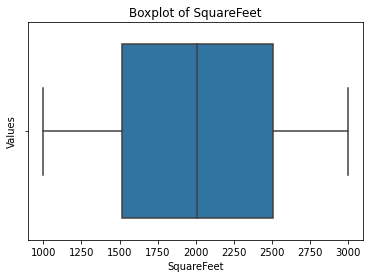

In [10]:
#box plot to check the outliers if any
sns.boxplot(x=df['SquareFeet'])
plt.xlabel('SquareFeet')
plt.ylabel('Values')
plt.title('Boxplot of SquareFeet')
plt.show()

**Check for outliers**   
Price

Quick Summary - Outliers are present

In [11]:
#Range of the square feet
print("min price :", np.min(df['Price']))
print("max price :", np.max(df['Price']))

min price : -36588.16539749279
max price : 492195.2599720151


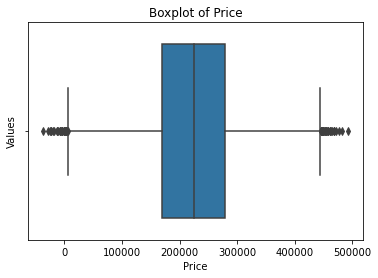

In [12]:
#box plot to check the outliers if any
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.ylabel('Values')
plt.title('Boxplot of Price')
plt.show()

In [13]:
df[df['Price'] < 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


Infernce : Price has negative value

**Data Distribution**

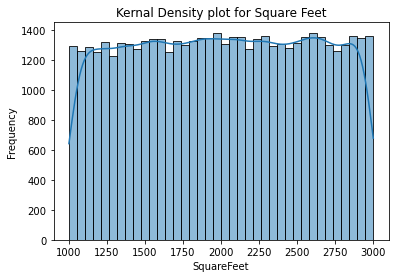

In [14]:
#Square feet
sns.histplot(df['SquareFeet'], kde=True)
plt.xlabel('SquareFeet')
plt.ylabel('Frequency')
plt.title('Kernal Density plot for Square Feet')
plt.show()

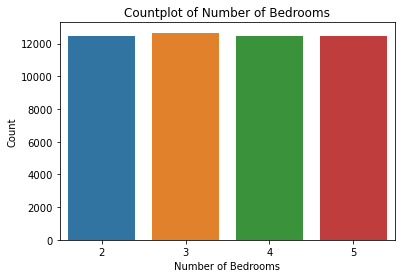

In [15]:
#bedrooms
sns.countplot(x='Bedrooms', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Countplot of Number of Bedrooms')
plt.show()

In [16]:
df['Bedrooms'].value_counts()

3    12661
5    12468
2    12436
4    12435
Name: Bedrooms, dtype: int64

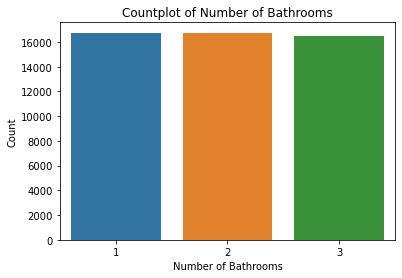

In [17]:
#Bathrooms
sns.countplot(x='Bathrooms', data=df)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Countplot of Number of Bathrooms")
plt.show()

In [18]:
df['Bathrooms'].value_counts()

1    16755
2    16719
3    16526
Name: Bathrooms, dtype: int64

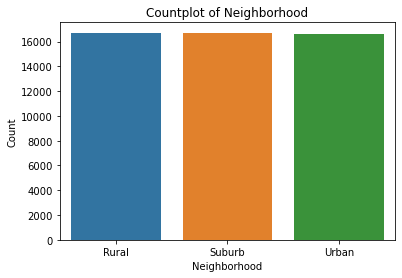

In [19]:
#Neighborhood 

sns.countplot(x='Neighborhood', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Countplot of Neighborhood')
plt.show()

In [20]:
df['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

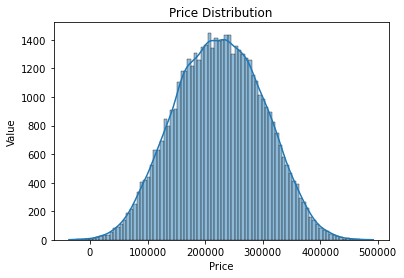

In [21]:
#Price

sns.histplot(df['Price'], kde=True)
plt.xlabel("Price")
plt.ylabel('Value')
plt.title("Price Distribution")
plt.show()

**Feature creation**

In [22]:
df["buildingAge"]  = 2023 - df["YearBuilt"]

In [23]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,buildingAge
0,2126,4,1,Rural,1969,215355.283618,54
1,2459,3,2,Rural,1980,195014.221626,43
2,1860,2,1,Suburb,1970,306891.012076,53
3,2294,2,1,Urban,1996,206786.787153,27
4,2130,5,2,Suburb,2001,272436.239065,22


In [24]:
#Drop "YearBuild"
df  = df.drop(columns='YearBuilt')


In [25]:
#Modified Dataframe
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price,buildingAge
0,2126,4,1,Rural,215355.283618,54
1,2459,3,2,Rural,195014.221626,43
2,1860,2,1,Suburb,306891.012076,53
3,2294,2,1,Urban,206786.787153,27
4,2130,5,2,Suburb,272436.239065,22


In [26]:
#Range of the building age
print("min Building Age :", np.min(df['buildingAge']))
print("max  Building Age :", np.max(df['buildingAge']))

min Building Age : 2
max  Building Age : 73


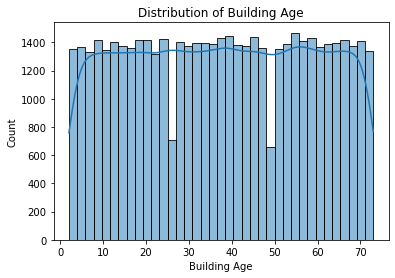

In [27]:
sns.histplot(x='buildingAge', data=df, kde=True)
plt.xlabel('Building Age')
plt.ylabel('Count')
plt.title("Distribution of Building Age")
plt.show()

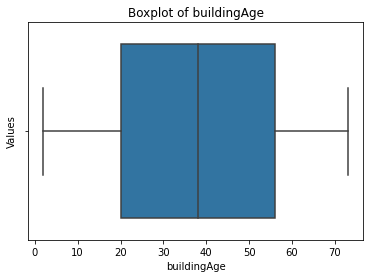

In [28]:
#box plot to check the outliers if any
sns.boxplot(x=df['buildingAge'])
plt.xlabel('buildingAge')
plt.ylabel('Values')
plt.title('Boxplot of buildingAge')
plt.show()

**Encoding Neighborhood**

Encoding the neighborhood with onehot encoding as it is an "unordered" category

In [55]:
#Import library
from sklearn.preprocessing import OneHotEncoder

#Create an instance for one hot encoder
ohe = OneHotEncoder(sparse=False)

#passing encoded column
ohe_data = pd.DataFrame(ohe.fit_transform(df[['Neighborhood']]))

#by default, the output "ohe_data" will be a dataframe with default column names (0,1,2 etc). Hence I am assinging the category name
# as its column name. In order to do this, we have to convert the values in "ohe.categories" into a list. The following
#code helps to do the same

#find the column names and convert into a list
col_values = pd.Series(ohe.categories_[0]).tolist()

#Assign the category values as the column names of one hot encoded features
ohe_data.rename(columns=dict(zip(ohe_data.columns, col_values)), inplace=True)

#Merge the one hot encoded columns to the main df
df_enc = df.join(ohe_data)

#finally, drop the column "Neighborhood" as we now have the encoded features of this column
df_enc.drop('Neighborhood', axis=1, inplace=True)

In [56]:
df_enc.head()

,SquareFeet,Bedrooms,Bathrooms,Price,buildingAge,Rural,Suburb,Urban
0,2126,4,1,215355.283618,54,1.0,0.0,0.0
1,2459,3,2,195014.221626,43,1.0,0.0,0.0
2,1860,2,1,306891.012076,53,0.0,1.0,0.0
3,2294,2,1,206786.787153,27,0.0,0.0,1.0
4,2130,5,2,272436.239065,22,0.0,1.0,0.0


**Negative Value Handling**

To enable the data treated with missing values, I have replaced all the negative values with NaN, so that the imputation algorithms could recognize them as a missing value

In [57]:
df_enc.loc[df_enc["Price"] < 0, "Price"] = np.NaN


In [58]:
#Check again for the missing values
df_enc.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Price          22
buildingAge     0
Rural           0
Suburb          0
Urban           0
dtype: int64

Now its seen that all the negative values are replaced by NaN

In [59]:
#Missing value treatment with KNN Imputer
from sklearn.impute import KNNImputer

#Instantiate KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=2)

#Fit and transform the Dataframe to replace missing values
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_enc), columns=df_enc.columns)


In [60]:
#Check whether all the missing values are replaced
df_imputed.isnull().sum()

SquareFeet     0
Bedrooms       0
Bathrooms      0
Price          0
buildingAge    0
Rural          0
Suburb         0
Urban          0
dtype: int64

All the missing values are imputed with the knn_imputer

In [61]:
#Summary of "Price" to check whether the negative values are removed
df_imputed['Price'].describe()

count     50000.000000
mean     224897.636318
std       75998.463580
min         154.779120
25%      169978.122346
50%      225052.141166
75%      279373.630052
max      492195.259972
Name: Price, dtype: float64

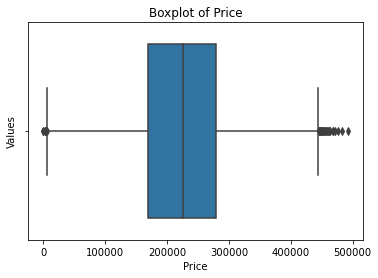

In [62]:
#box plot to check the outliers in "Price" after negative values are replaced

sns.boxplot(x=df_imputed['Price'])
plt.xlabel('Price')
plt.ylabel('Values')
plt.title('Boxplot of Price')
plt.show()

Inference - While the outliers with the negative values are removed, the positive side still exists. Need to check this

In [63]:
df_imputed.head()

,SquareFeet,Bedrooms,Bathrooms,Price,buildingAge,Rural,Suburb,Urban
0,2126.0,4.0,1.0,215355.283618,54.0,1.0,0.0,0.0
1,2459.0,3.0,2.0,195014.221626,43.0,1.0,0.0,0.0
2,1860.0,2.0,1.0,306891.012076,53.0,0.0,1.0,0.0
3,2294.0,2.0,1.0,206786.787153,27.0,0.0,0.0,1.0
4,2130.0,5.0,2.0,272436.239065,22.0,0.0,1.0,0.0


**End of Question 1**

### Question 2 : Recommend where to buy house - Rural or Suburb or Urban?

**Answer Summary:**

From the bivariate plots displayed below, the features like Price, SquareFeet, Building Age, Bath and Bedrooms are equally distributed for various neighborhoods. 

It is very clearly evident from the plots there is no signicant difference seen among purchasing the house in any one of the neighborhood categories.

Hence I conclude that **No significant difference seen on purchasing a house among the neighborhood categories**


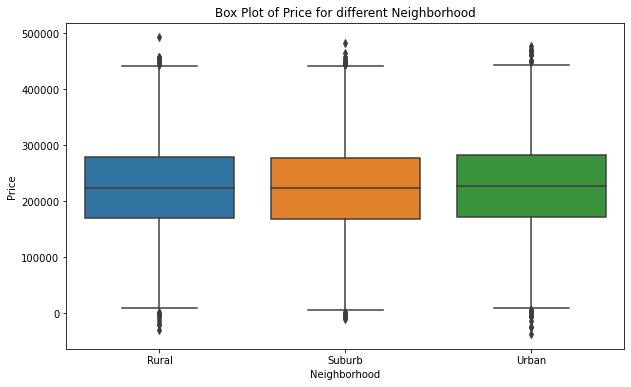

In [122]:
#Bivariate analysis between Neighborhood and Price
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='Price', data=df )

#adding labels to the categories
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Box Plot of Price for different Neighborhood')
plt.show()

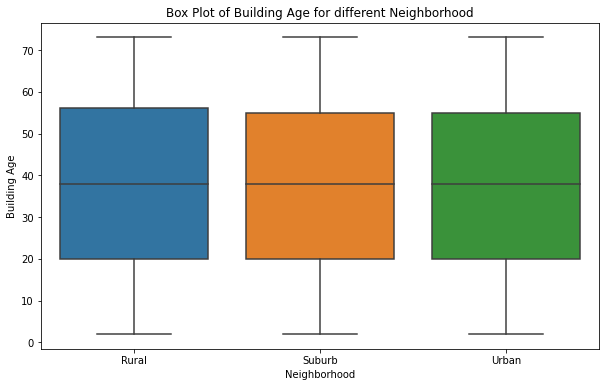

In [117]:
#Bivariate analysis between Neighborhood and Building Age
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='buildingAge', data=df )

#adding labels to the categories
plt.xlabel('Neighborhood')
plt.ylabel('Building Age')
plt.title('Box Plot of Building Age for different Neighborhood')
plt.show()

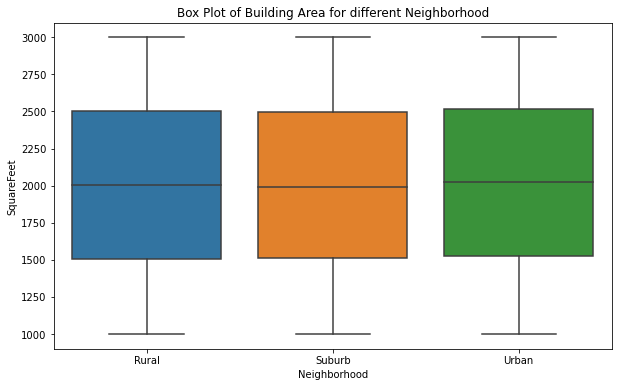

In [119]:
#Bivariate analysis between Neighborhood and SquareFeet
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='SquareFeet', data=df )

#adding labels to the categories
plt.xlabel('Neighborhood')
plt.ylabel('SquareFeet')
plt.title('Box Plot of Building Area for different Neighborhood')
plt.show()

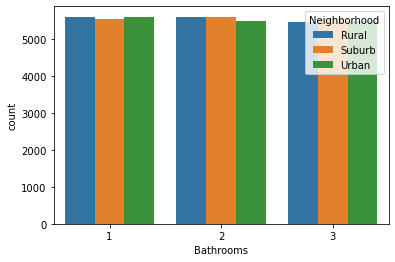

In [112]:
#Bivariate analysis between Neighborhood and Bathrooms
sns.countplot(x="Bathrooms", hue="Neighborhood", data=df)
plt.title('Count Plot of Bathrooms for different Neighborhood')
plt.show()

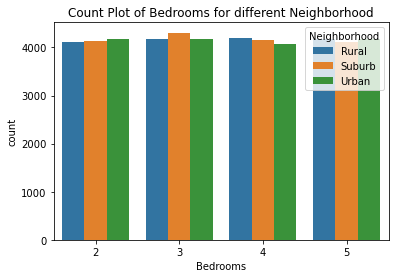

In [120]:
sns.countplot(x="Bedrooms", hue="Neighborhood", data=df)
plt.title('Count Plot of Bedrooms for different Neighborhood')
plt.show()

**End of Question 2**

### Question 3 - Build a regression model to predict housing prices. Justify the choice of model and approach overall

**Inferences**

**Top Features as per LR**
Feature Ranking:   

       Feature   Coefficient  Absolute Coefficient     
1     Bedrooms   5235.462053           5235.462053     
2    Bathrooms   2956.658971           2956.658971    
5        Urban   1172.280640           1172.280640    
6       Suburb   -899.809732            899.809732    
4        Rural   -272.470908            272.470908    
0   SquareFeet     99.142700             99.142700    
3  buildingAge      5.925531              5.925531    


**Best model as per LR**            
Best model found with all features           
Mean Squared Error: 2429186828.446782            
R-Squared : 0.5757025386100848                      


**Top Features as per XGB**
1. Square Feet
2. BedRooms
3. Bathrooms

**Best model as per XGB**      
Mean Squared Error: 2436231204.2277884             
R-Squared : 0.5744721224370855              


**Relationship betwen building area and price with neighborhood as a hue**

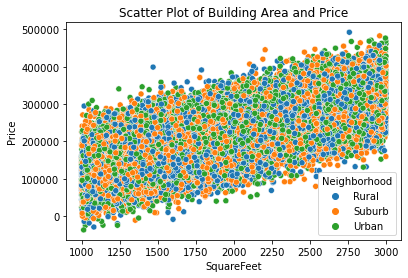

In [131]:
# Scatter Plot
sns.scatterplot(x='SquareFeet', y='Price', hue='Neighborhood', data=df)
plt.title("Scatter Plot of Building Area and Price")
plt.show()

Inference - As the area increases, Price increases.        
No Significant difference seen because of the neighborhood

In [127]:
#Correlation Coefficient 
correlation = df_imputed['SquareFeet'].corr(df_imputed['Price'])
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.7507349062975743


In [132]:
#Regression Analysis 
from sklearn.linear_model import LinearRegression

X = df_imputed[['SquareFeet']]
y= df_imputed['Price']

model = LinearRegression()
model.fit(X,y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficient (SquareFeet): {model.coef_[0]}')

Intercept: 25991.518943668954
Coefficient (SquareFeet): 99.13707512216074


Price = 99.13SquareFeet + 25991.52 + Error 

C:\Users\Z0176142\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


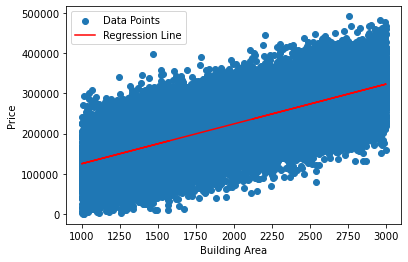

In [137]:
# Visulaization of Regression Line
X_np = np.array(X['SquareFeet']).reshape(-1, 1)

plt.scatter(X, y, label='Data Points')
plt.plot(X_np, model.predict(X_np), color='red', label='Regression Line')
plt.xlabel('Building Area')
plt.ylabel('Price')
plt.legend()
plt.show()

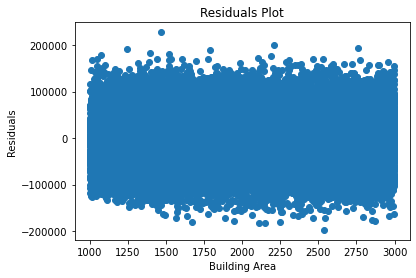

In [138]:
#Residual Analysis
residuals = y - model.predict(X)
plt.scatter(X, residuals)
plt.xlabel('Building Area')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**Relationship betwen building age and price with neighborhood as a hue**

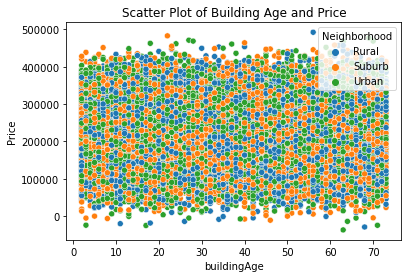

In [139]:
# Scatter Plot
sns.scatterplot(x='buildingAge', y='Price', hue='Neighborhood', data=df)
plt.title("Scatter Plot of Building Age and Price")
plt.show()

In [140]:
#Correlation Coefficient 
correlation = df_imputed['buildingAge'].corr(df_imputed['Price'])
print(f'Correlation Coefficient: {correlation}')

Correlation Coefficient: 0.002301934406532932


Inference - No pattern is seen

In [141]:
#Regression Analysis 
from sklearn.linear_model import LinearRegression

X = df_imputed[['buildingAge']]
y= df_imputed['Price']

model = LinearRegression()
model.fit(X,y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficient (SquareFeet): {model.coef_[0]}')

Intercept: 224580.19908872637
Coefficient (SquareFeet): 8.443472059848466


Price = 8.443 * BuildingAge + 224580.2 + Error

C:\Users\Z0176142\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


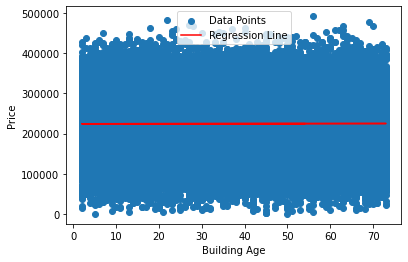

In [143]:
# Visulaization of Regression Line
X_np = np.array(X['buildingAge']).reshape(-1, 1)

plt.scatter(X, y, label='Data Points')
plt.plot(X_np, model.predict(X_np), color='red', label='Regression Line')
plt.xlabel('Building Age')
plt.ylabel('Price')
plt.legend()
plt.show()

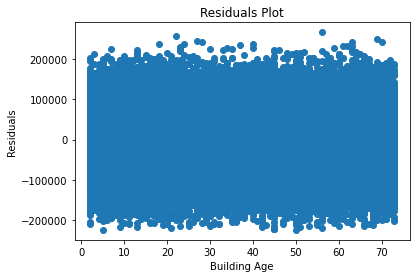

In [144]:
#Residual Analysis
residuals = y - model.predict(X)
plt.scatter(X, residuals)
plt.xlabel('Building Age')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**Relationship between bathrooms and Residuals**

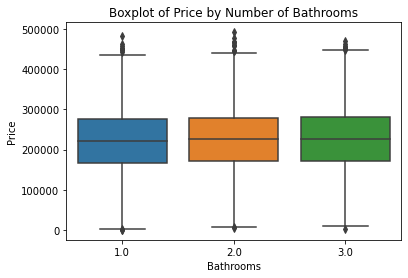

In [147]:
sns.boxplot(x='Bathrooms', y='Price', data=df_imputed)
plt.title('Boxplot of Price by Number of Bathrooms')
plt.show()

**Relationship between number of Bedrooms and Price**


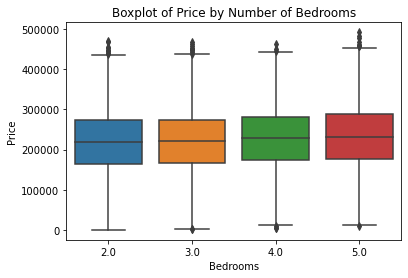

In [148]:
sns.boxplot(x='Bedrooms', y='Price', data=df_imputed)
plt.title('Boxplot of Price by Number of Bedrooms')
plt.show()

**Relationship between Neighborhood and Price**

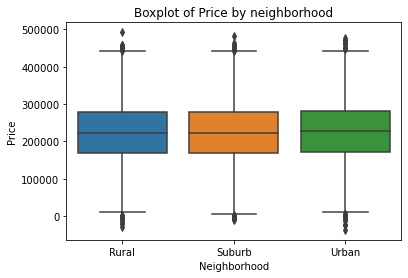

In [151]:
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Boxplot of Price by neighborhood')
plt.show()

**Relationship between Building Area & Building Age**

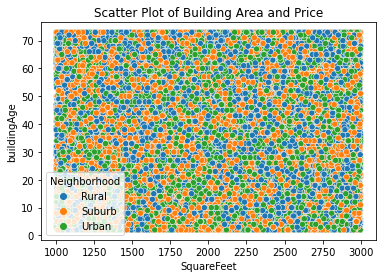

In [157]:
sns.scatterplot(x='SquareFeet', y='buildingAge', hue='Neighborhood', data=df)
plt.title("Scatter Plot of Building Area and Price")
plt.show()

Inference - no inferene seen

**Building a Regression Model**

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 2459496283.3257666
R-Squared : 0.5704084934544522
Coefficients : [[99.14507098]]
Intercept : [25990.52997246]


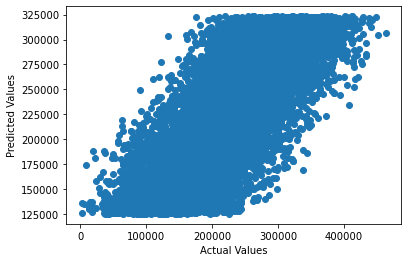

In [193]:
#Linear Regression only with SquareFeet

X = df_imputed[['SquareFeet']]
y = df_imputed[['Price']]

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#train the model
model=LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_


#Predict
y_pred = model.predict(X_test)


#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared : {r2}')
print(f'Coefficients : {coefficients}')
print(f'Intercept : {intercept}')

#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Mean Squared Error: 2429186828.446782
R-Squared : 0.5757025386100848
Coefficients : [[  99.14270019 5235.46205308 2956.65897143    5.92553069 -272.47090753
  1172.28063981 -899.80973228]]
Intercept : [1528.65348703]


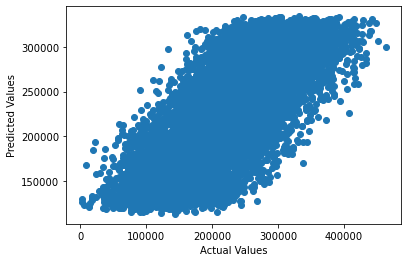

In [194]:
#Linear Regression only with all input features

X = df_imputed[['SquareFeet', 'Bedrooms', 'Bathrooms', 'buildingAge', 'Rural', 'Urban', 'Suburb']]
y = df_imputed[['Price']]

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#train the model
model=LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

#Predict
y_pred = model.predict(X_test)


#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared : {r2}')
print(f'Coefficients : {coefficients}')
print(f'Intercept : {intercept}')

#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Rank Features by Coefficients**

In [195]:
feature_names = X.columns
coefficients = model.coef_
coefficients = coefficients.flatten()

feature_ranking = pd.DataFrame({'Feature' : feature_names, 'Coefficient' : coefficients})
feature_ranking['Absolute Coefficient'] = feature_ranking['Coefficient'].abs()
feature_ranking = feature_ranking.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Ranking:")
print(feature_ranking)


Feature Ranking:
       Feature  Coefficient  Absolute Coefficient
1     Bedrooms  5235.462053           5235.462053
2    Bathrooms  2956.658971           2956.658971
5        Urban  1172.280640           1172.280640
6       Suburb  -899.809732            899.809732
4        Rural  -272.470908            272.470908
0   SquareFeet    99.142700             99.142700
3  buildingAge     5.925531              5.925531


**Feature Importance as per Linear Regression**

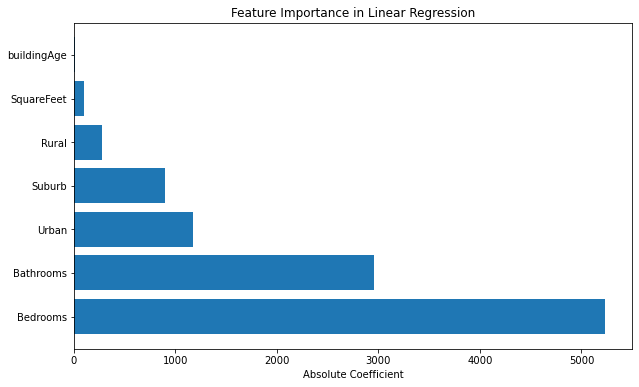

In [196]:
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance in Linear Regression')
plt.show()

Mean Squared Error: 5705774177.330771
R-Squared : 0.003392629024945415
Coefficients : [[5186.30711761]]
Intercept : [206703.35469127]


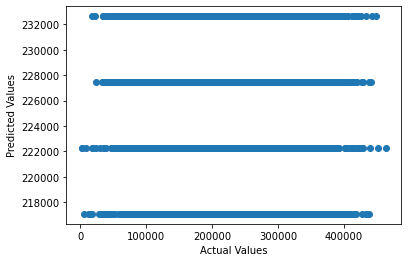

In [197]:
#Linear Regression with bedrooms as it has highest coeff)

X = df_imputed[['Bedrooms']]
y = df_imputed[['Price']]

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#train the model
model=LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

#Predict
y_pred = model.predict(X_test)


#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared : {r2}')
print(f'Coefficients : {coefficients}')
print(f'Intercept : {intercept}')

#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Mean Squared Error: 5706145759.106469
R-Squared : 0.003327726151983512
Coefficients : [[5186.98496901 2892.92230385]]
Intercept : [200923.2356848]


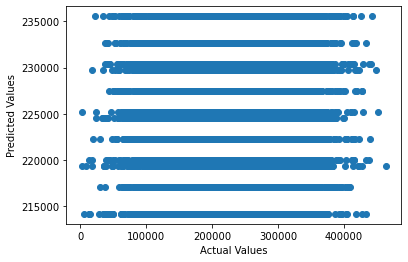

In [198]:
#Linear Regression with bedrooms as it has highest coeff)

X = df_imputed[['Bedrooms', 'Bathrooms']]
y = df_imputed[['Price']]

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#train the model
model=LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

#Predict
y_pred = model.predict(X_test)


#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared : {r2}')
print(f'Coefficients : {coefficients}')
print(f'Intercept : {intercept}')

#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**XGB Regressor**

In [199]:
from xgboost import XGBRegressor

X = df_imputed[['SquareFeet', 'Bedrooms', 'Bathrooms', 'buildingAge', 'Rural', 'Urban', 'Suburb']]
y = df_imputed[['Price']]

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)




#Create a XGB Regressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

#Train the model
xgb_model.fit(X_train,y_train)

#Make predictions
y_pred = xgb_model.predict(X_test)

#Evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared : {r2}')



Mean Squared Error: 2436231204.2277884
R-Squared : 0.5744721224370855


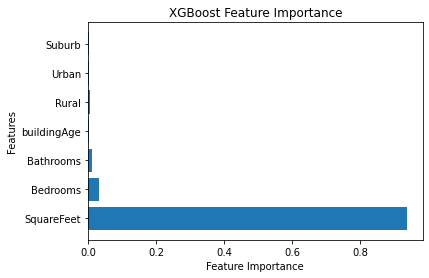

In [200]:
#Feature Importance from XGBoost

# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X.columns


# Visualize feature importance
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [201]:
xgb_model.feature_importances_

array([0.9375832 , 0.03246777, 0.0121231 , 0.00319079, 0.00705007,
       0.00436605, 0.00321897], dtype=float32)